# Diana Valladares - Food Sales Prediction Project

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project - Food Sales Predictions/sales_predictions (1).csv"
df = pd.read_csv (filename)
df.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In [92]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('Regularularular', 'Regular')

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Rows & Columns

In [8]:
df.shape

(8523, 12)

In [9]:
# Datatypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
# Duplicates? If so, we'll drop 'em.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [11]:
df.duplicated().sum()


0

In [12]:
# Missing Values?


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df.drop(columns=['Outlet_Size'], inplace=True)
df.isna().sum()
# I deleted entire columns because the number of unique entried for the column is only 3 and therefore shouldnt pose an impact on data calculations. 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)


In [18]:
df['Item_Weight'].mean()

12.813419570574444

In [19]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
#For the missing values in the weight column I just subsituted the NA, NaN, etc for the average Median Weight of the objects. It should pose no significance for food sales predictions as a whole, but we should keep the data instead of deleting it. 

In [21]:
# Calculating the min, max and mean for each numerical column

df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].mean()

Item_Weight            12.813420
Item_Visibility         0.066132
Item_MRP              140.992782
Item_Outlet_Sales    2181.288914
dtype: float64

In [22]:
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].min()

Item_Weight           4.555
Item_Visibility       0.000
Item_MRP             31.290
Item_Outlet_Sales    33.290
dtype: float64

In [23]:
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].max()

Item_Weight             21.350000
Item_Visibility          0.328391
Item_MRP               266.888400
Item_Outlet_Sales    13086.964800
dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [40]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [42]:
df['Outlet_Size'].fillna('No Info', inplace=True)
df['Outlet_Size'].value_counts()

Medium     2793
No Info    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn 

# Boxplots, Histograms and Heat Maps

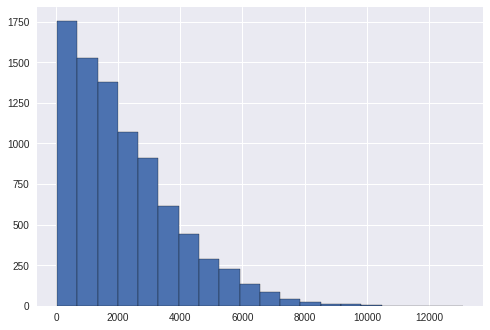

In [39]:
plt.style.use('seaborn')
df["Item_Outlet_Sales"].hist(bins=20, edgecolor = 'black')

Hisotgram tells us the distribution of sales at face value - we can see the graph is skewed to the right. 

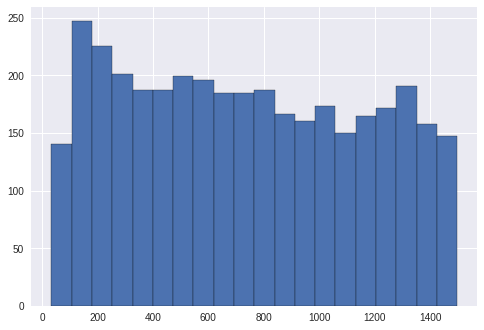

In [34]:
plt.style.use("seaborn")
item_priceFilter = df.loc[:, 'Item_Outlet_Sales'] <= 1500
df.loc[item_priceFilter, 'Item_Outlet_Sales'].hist(bins=20, edgecolor='black')
plt.ticklabel_format(useOffset=False, style='plain')

Here we examine the same column, as the above "Outlet Item Sales" but this time we graph our histogram where the Outlet Sales values are above 1500$ in value.

This distribution of values of over 1500$ in sales gives us a very balanced, uniform histogram, meaning that the data is very consistent with the frequency of the class being similiar to others in the same class. 

With the .corr() function applied to the datafram, Python allows us to easily represent which variables are closely relted to each other. Via a correlation coefficient, the higher it is to 1.0 the higher and stronger the association between two variables are. 

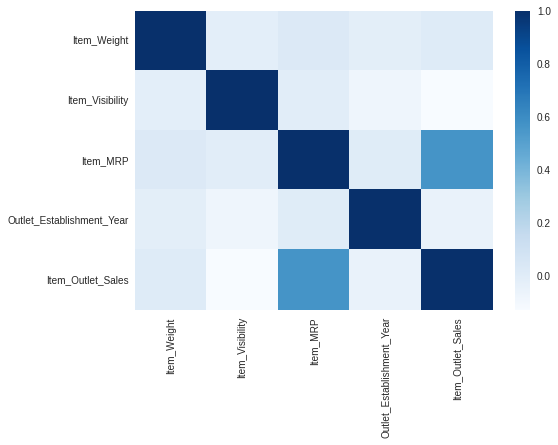

In [114]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues')

We can use the function '.corr()' we can find the correlation between two variables or more, including all variables against all variables. Usually, a high correlation is between 1.0 and 0.7; Medium Strength is between 0.7 and 0.3 and Zero to Little correlation from 0.3 to 0.0. 

For Example, we can find the correlation between 2 columns: 

In [65]:
correlation = df["Item_Visibility"].corr(df["Item_Outlet_Sales"])
correlation

-0.12862461222077026

 This correlation coefficient demonstrates weak to no correlation on the graph. 

In [69]:
correlation = df['Item_MRP'].corr(df['Item_Outlet_Sales'])
correlation

0.5675744466569194

These two variables give us a medium strength correlation of > 0.50. 

In [101]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

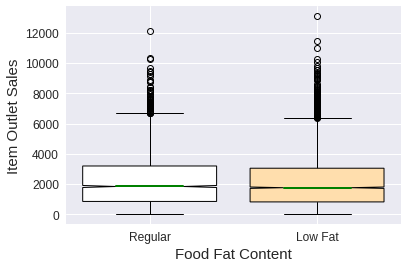

In [109]:
regular = df.loc[df['Item_Fat_Content']=='Regular','Item_Outlet_Sales'].values
low_fat = df.loc[df['Item_Fat_Content'] == 'Low Fat', 'Item_Outlet_Sales'].values
#plt.boxplot([regular, low_fat], labels=['Regular', 'Low fat']);
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
boxplots = axes.boxplot([regular ,low_fat],
           labels=['Regular', 'Low Fat']  ,           
           notch = True,
           widths = .8,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Green'),
);
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('white')
boxplot2= boxplots['boxes'][1]
boxplot2.set_facecolor('navajowhite')
plt.ylabel('Item Outlet Sales', fontsize = 15);
plt.xlabel('Food Fat Content', fontsize = 15);

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


This comparison between the Fat Content of each item and the sales for each outlet shows us the similarites between the Low Fat and Regular Foods sold. The mean items for Regular and Low fat seem to remain at a constant mean of around 2K in sales - the content of fat in items seem to not disturb the data. 